### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd
import os

In [2]:
dataLocation = "Recordings/SoftwareProject/"
os.listdir(dataLocation)

singleBlinkLoc = dataLocation + "OpenBCISession_2020-04-25_15-29-52-eyeblink/"
singleBlinkLoc = singleBlinkLoc + os.listdir(singleBlinkLoc)[0]

dataStartLine = 6

#### reading single blink

In [109]:
singleBlinkRaw = []

# Using readlines() 

count = 0
for line in open(singleBlinkLoc, 'r').readlines(): 
    if count >= dataStartLine:
#         print(line.strip().split(','))
        singleBlinkRaw.append(line.strip().split(','))
    else:
        count += 1
singleBlinkRaw = np.char.strip(np.array(singleBlinkRaw))

# with open(singlBlinkLoc) as f:
#     singleBlinkRaw = np.array(f.read().splitlines()[dataStartLine:])

In [27]:
singleBlinkRaw

array([['0', '152.06', '-265.02', ..., '0.000', '15:30:25.402',
        '1587846625402'],
       ['1', '158.57', '-259.45', ..., '0.000', '15:30:25.418',
        '1587846625418'],
       ['2', '169.74', '-239.23', ..., '0.000', '15:30:25.418',
        '1587846625418'],
       ...,
       ['70', '149.06', '-246.25', ..., '0.000', '15:31:00.937',
        '1587846660937'],
       ['71', '121.62', '-280.72', ..., '0.000', '15:31:00.938',
        '1587846660938'],
       ['72', '146.45', '-248.59', ..., '0.000', '15:31:00.938',
        '1587846660938']], dtype='<U14')

#### Graphing the data

#### Data Format:
##### [index, channel1, channel2, channel3, channel4, X, X, X, Time, Voltage]

In [32]:
# getting just the data channels recorded
singleBlinkChannels = singleBlinkRaw[:, 1:5]
singleBlinkTime = singleBlinkRaw[:, 8:9]

#### plot the data

In [21]:
singleBlinkTime[1:10]

array([['15:30:25.418'],
       ['15:30:25.418'],
       ['15:30:25.431'],
       ['15:30:25.431'],
       ['15:30:25.432'],
       ['15:30:25.432'],
       ['15:30:25.447'],
       ['15:30:25.447'],
       ['15:30:25.461']], dtype='<U14')

In [7]:
timeThing = "15:30:25.402"

In [8]:
from datetime import datetime

datetime_object = datetime.strptime(timeThing, '%H:%M:%S.%f')

In [9]:
datetime_object

datetime.datetime(1900, 1, 1, 15, 30, 25, 402000)

#### Plotted channel 0
#### First 500 Points
##### channel vs standard step for every point (not properly time synced)

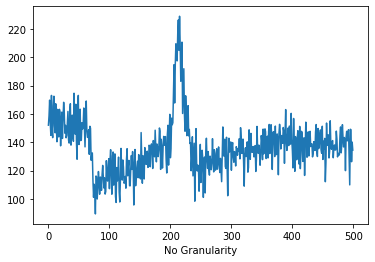

In [123]:
granularity = 1
data = singleBlinkChannels[:,0][:500:granularity]
plt.plot(np.arange(len(data)), data.astype(float))
plt.xlabel('No Granularity')
plt.show()

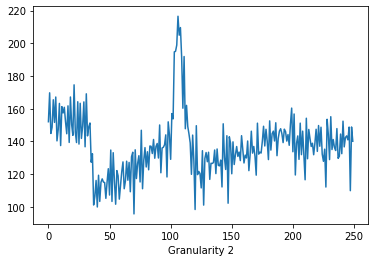

In [106]:
granularity = 2
data = singleBlinkChannels[:,0][:500:granularity]
plt.plot(np.arange(len(data)), data.astype(float))
plt.xlabel('Granularity 2')
plt.show()

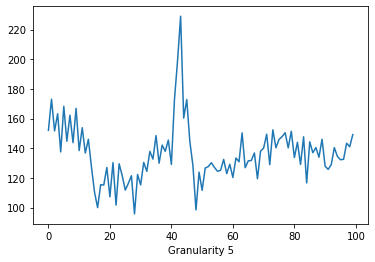

In [122]:
granularity = 5
data = singleBlinkChannels[:,0][:500:granularity]
plt.plot(np.arange(len(data)), data.astype(float))
plt.xlabel('Granularity 5')
plt.show()

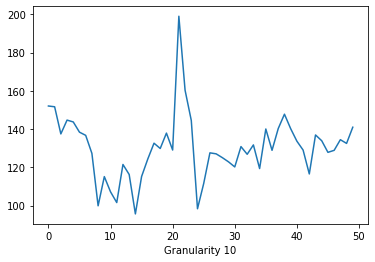

In [121]:
granularity = 10
data = singleBlinkChannels[:,0][:500:granularity]
plt.plot(np.arange(len(data)), data.astype(float))
plt.xlabel('Granularity 10')
plt.show()

### Plot multiple channels

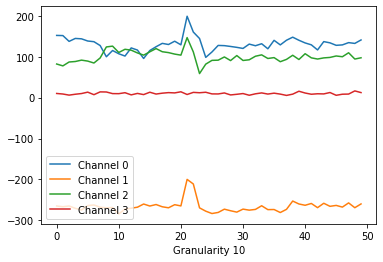

In [125]:
granularity = 10
channel0 = singleBlinkChannels[:,0][:500:granularity]
channel1 = singleBlinkChannels[:,1][:500:granularity]
channel2 = singleBlinkChannels[:,2][:500:granularity]
channel3 = singleBlinkChannels[:,3][:500:granularity]
plt.plot(np.arange(len(channel0)), channel0.astype(float), label = 'Channel 0')
plt.plot(np.arange(len(channel1)), channel1.astype(float), label = 'Channel 1')
plt.plot(np.arange(len(channel2)), channel2.astype(float), label = 'Channel 2')
plt.plot(np.arange(len(channel3)), channel3.astype(float), label = 'Channel 3')
plt.xlabel('Granularity 10')
plt.legend()
plt.show()